In [2]:
import pandas as pd
import numpy as np
import xarray as xr
import seaborn as sns
import string
from alias_period import tidal_aliasing
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:

constituent = ["2N2","EP2","J1","L2","M3","M4","MF","MI2","MKS","MM","MN4","MS4","MSF","MSQ"
            ,"MTM","N4","NI2","R2","S1","SA","SSA","T2",'M2','S2','N2','K2','K1','O1','P1','Q1']

catfile = "data/catHW95.dat"

alias_j1 = tidal_aliasing(constituent,catfile,'jason-1',output='array')
alias_en = tidal_aliasing(constituent,catfile,'envisat',output='array')


Cycle length = 9.9156 days
Cycle length = 35.0 days


In [4]:
Rc_j = np.reshape((np.repeat(alias_j1,len(alias_j1))), (len(alias_j1),len(alias_j1))).T
Ry_J = np.zeros((np.shape(Rc_j)))

Rc_e = np.reshape((np.repeat(alias_en,len(alias_en))), (len(alias_en),len(alias_en))).T
Ry_E = np.zeros((np.shape(Rc_e)))

for k in range(len(Ry_J[0])):
    Ry_J[:,k] = 1/np.abs(1/Rc_j[:,k] - 1/Rc_j[k])
    Ry_E[:,k] = 1/np.abs(1/Rc_e[:,k] - 1/Rc_e[k])


/Users/hart-davis/miniconda2/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/hart-davis/miniconda2/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [5]:
Ry_E = Ry_E.round(decimals=0)
Ry_J = Ry_J.round(decimals=0)

## Plotting Aliasing Periods

In [6]:
constituent = ["2N2","EP2","J1","L2","M3","M4","MF","MI2","MKS","MM","MN4","MS4","MSF","MSQ"
            ,"MTM","N4","NI2","R2","S1","SA","SSA","T2",'M2','S2','N2','K2','K1','O1','P1','Q1']

catfile = "data/catHW95.dat"

ja = tidal_aliasing(constituent,catfile,'jason-1',output='dataframe')
en = tidal_aliasing(constituent,catfile,'envisat',output='dataframe')

Cycle length = 9.9156 days
Alias periods output into dataframe
Cycle length = 35.0 days
Alias periods output into dataframe


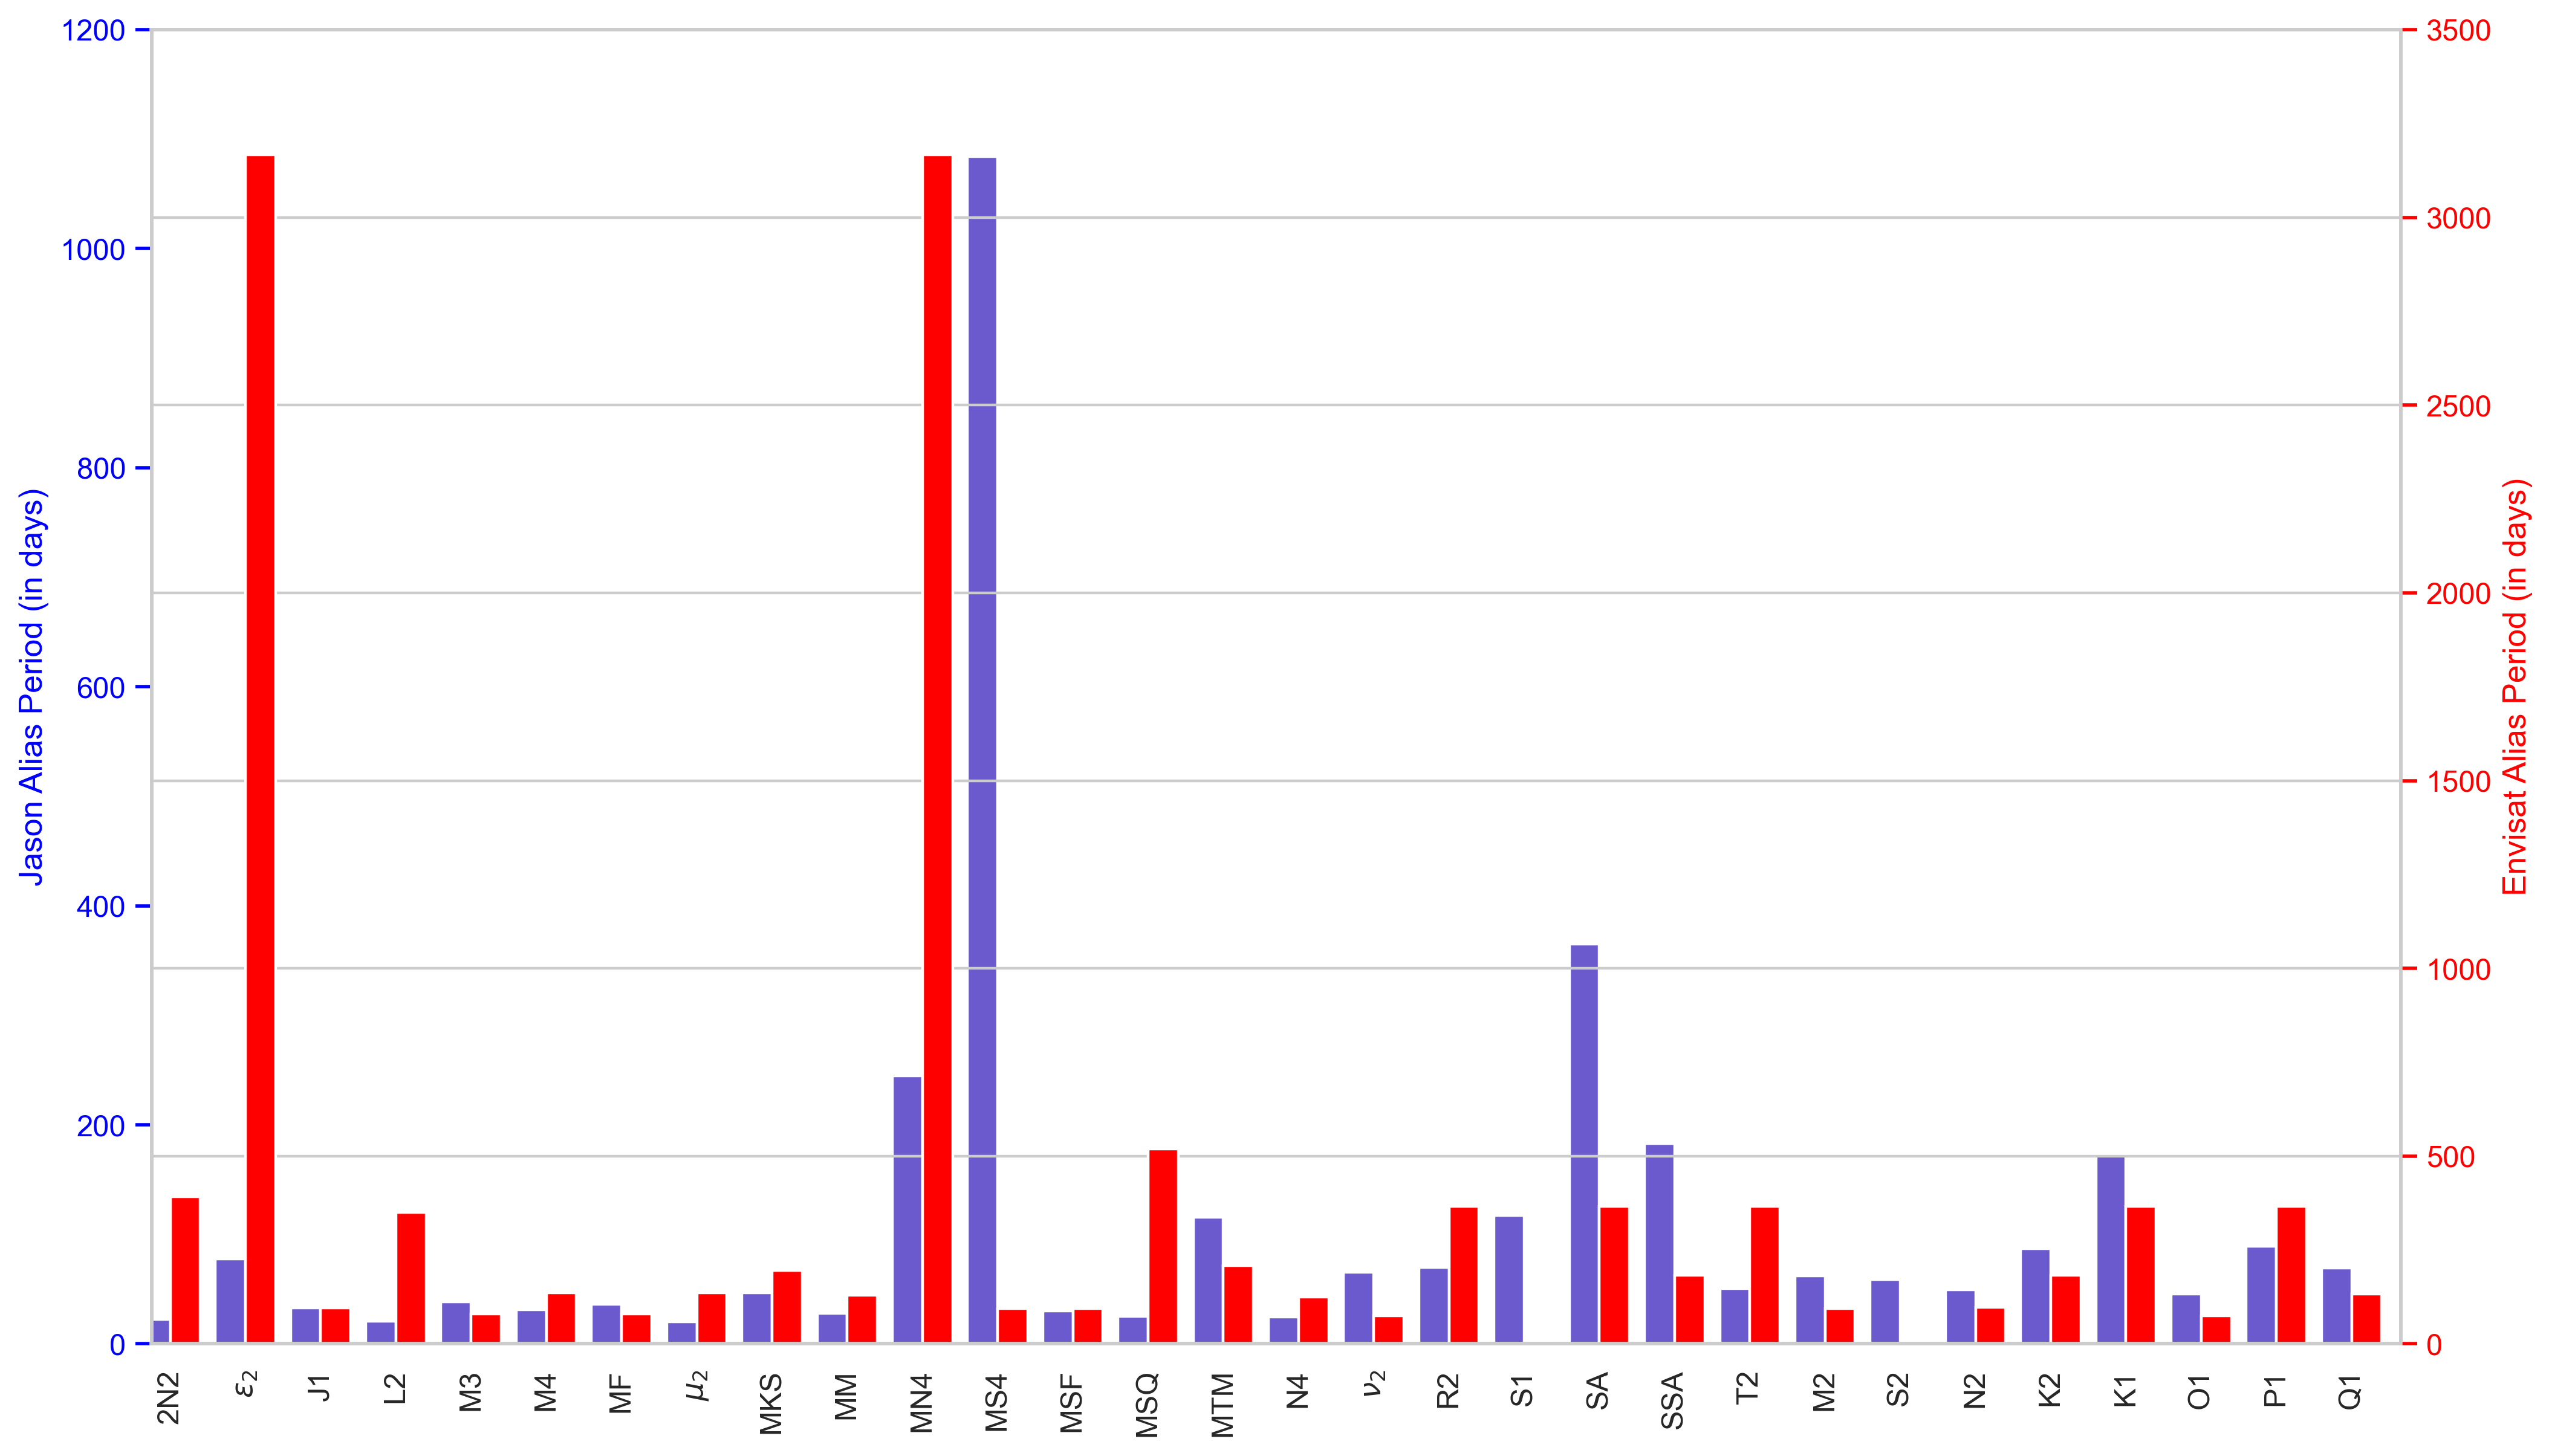

In [21]:
fig = plt.figure(figsize=(15,9),dpi=320) # Create matplotlib figure
sns.set_style("whitegrid")
# sns.set(font_scale=1)

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

ja.plot(kind='bar',ax=ax,legend=False,color='slateblue',position=1,
       grid=True,width=.4)
en.plot(kind='bar',ax=ax2,legend=False,color='red',position=0,
       grid=True,width=.4)

ax.grid(False)
ax.set_ylim(0,1200)
ax2.set_ylim(0,3500)

cons = ["2N2","$\epsilon_{2}$","J1","L2","M3","M4","MF","$\mu_{2}$","MKS","MM","MN4","MS4","MSF","MSQ"
            ,"MTM","N4","$\\nu_{2}$","R2","S1","SA","SSA","T2",'M2','S2','N2','K2','K1','O1','P1','Q1']

ax.set_xticklabels(cons)
ax.set_ylabel("Jason Alias Period (in days)")
ax2.set_ylabel("Envisat Alias Period (in days)")

# ax.spines['left'].set_color('blue')
ax.yaxis.label.set_color('blue')
ax.tick_params(axis='y', colors='blue')

# ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')

plt.savefig("/Users/hart-davis/Documents/GitHub/eot20_tides/figures/Minor_Tide_Paper/alias_periods_1.png")
plt.show()


## Plotting Rayleigh Coefficient

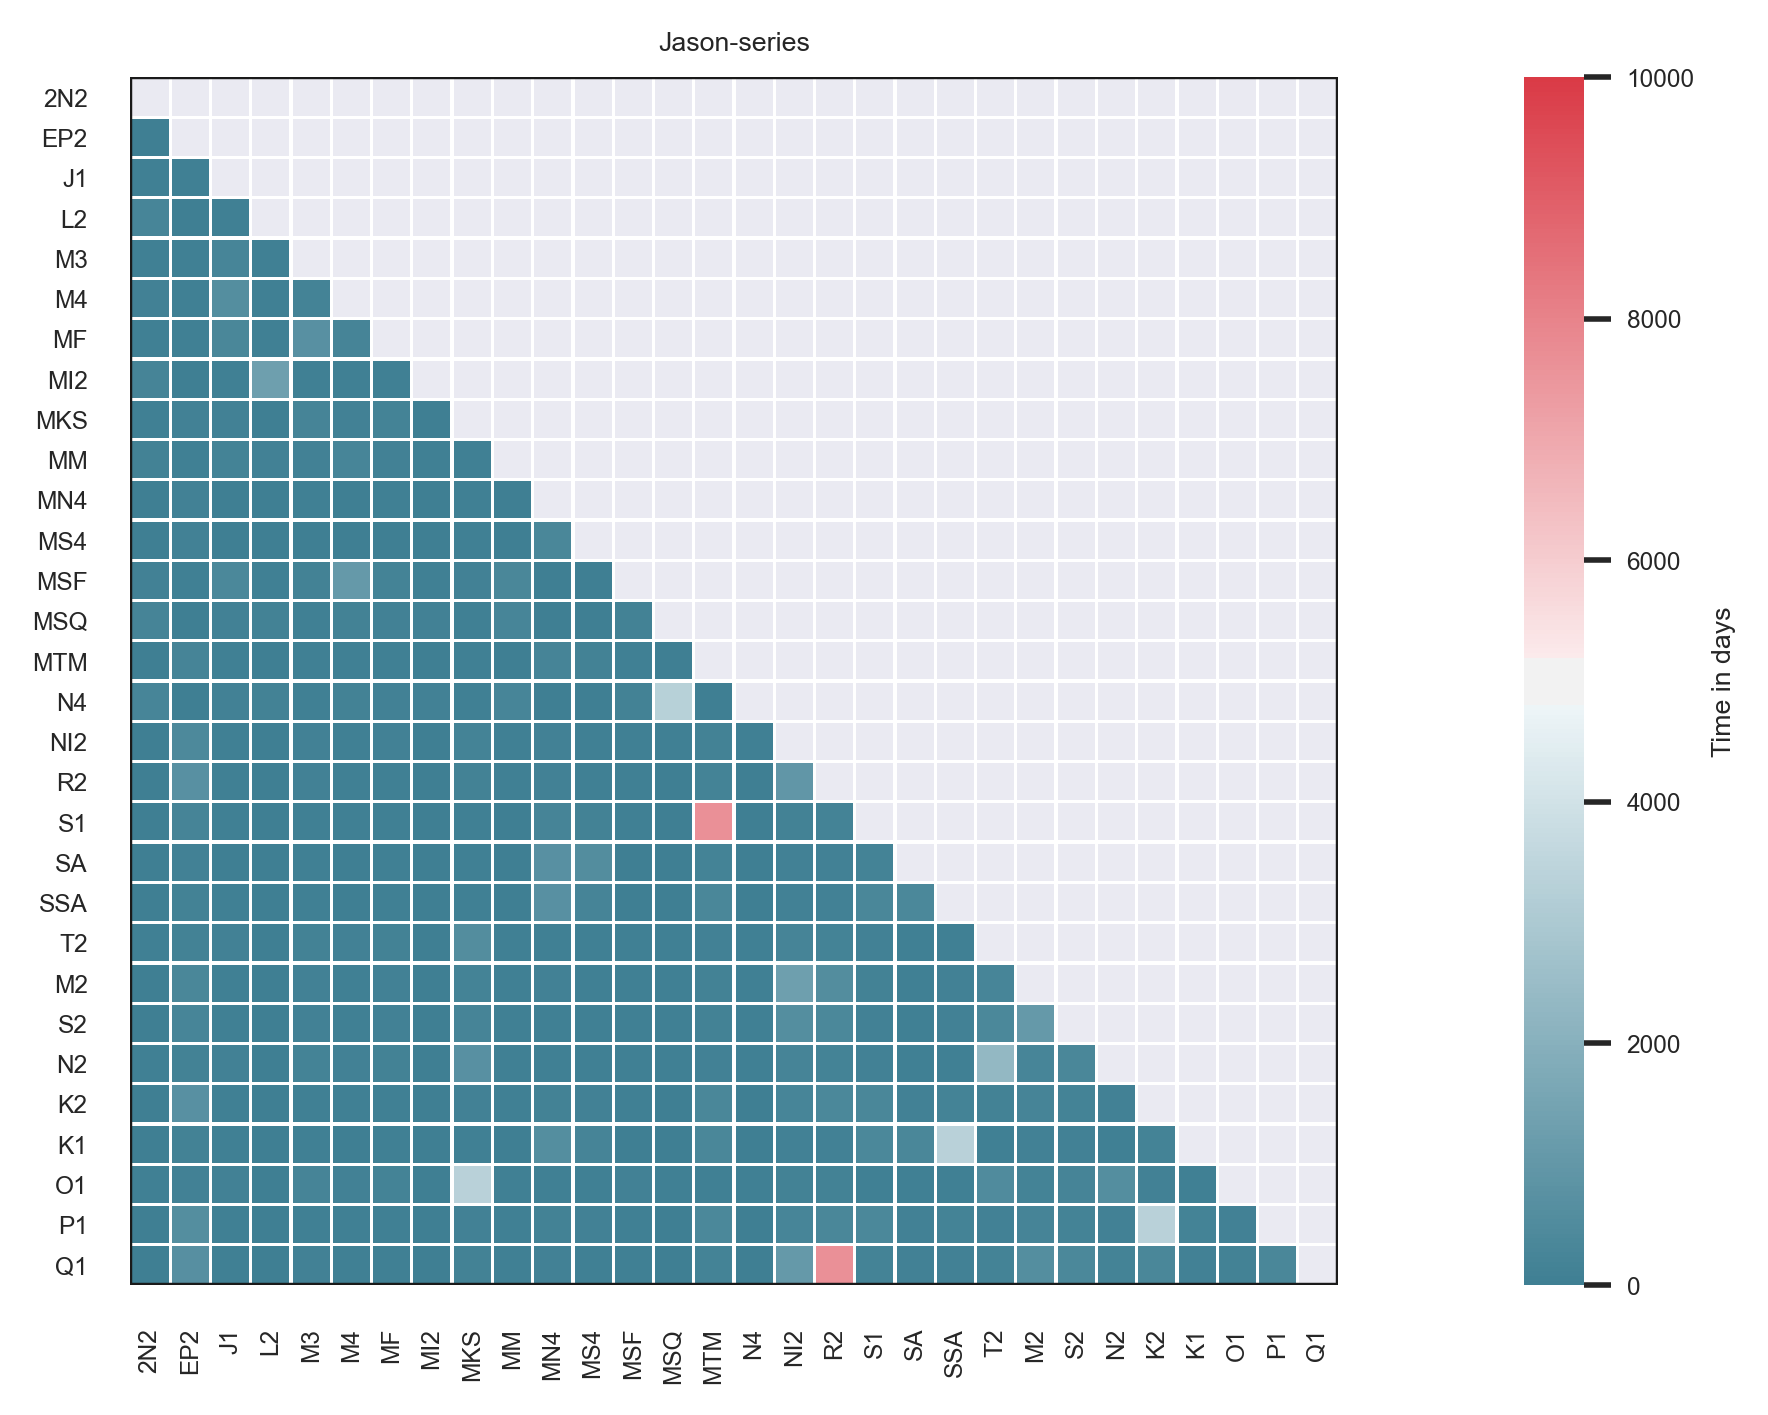

In [27]:
sns.set_style("darkgrid")
sns.set(font_scale=0.5)
letters = string.ascii_letters

d = pd.DataFrame(Ry_J)
# Compute the correlation matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(d, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(1,1,figsize=(15,5),dpi=320)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True,center='light')

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(d, mask=mask, cmap=cmap, vmax=10000, vmin = 0 , 
            square=True,linewidths=.5, cbar_kws={"label": 'Time in days'}, ax=ax,
                 xticklabels=constituent,yticklabels=constituent,cbar=True,)

ax.set_title("Jason-series")
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=d.shape[1], color='k',linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=d.shape[0], color='k',linewidth=1)

# plt.savefig("/Users/michaelhart-davis/Documents/GitHub/eot20_tides/figures/Minor_Tide_Paper/rayleigh_js.png")

plt.show()

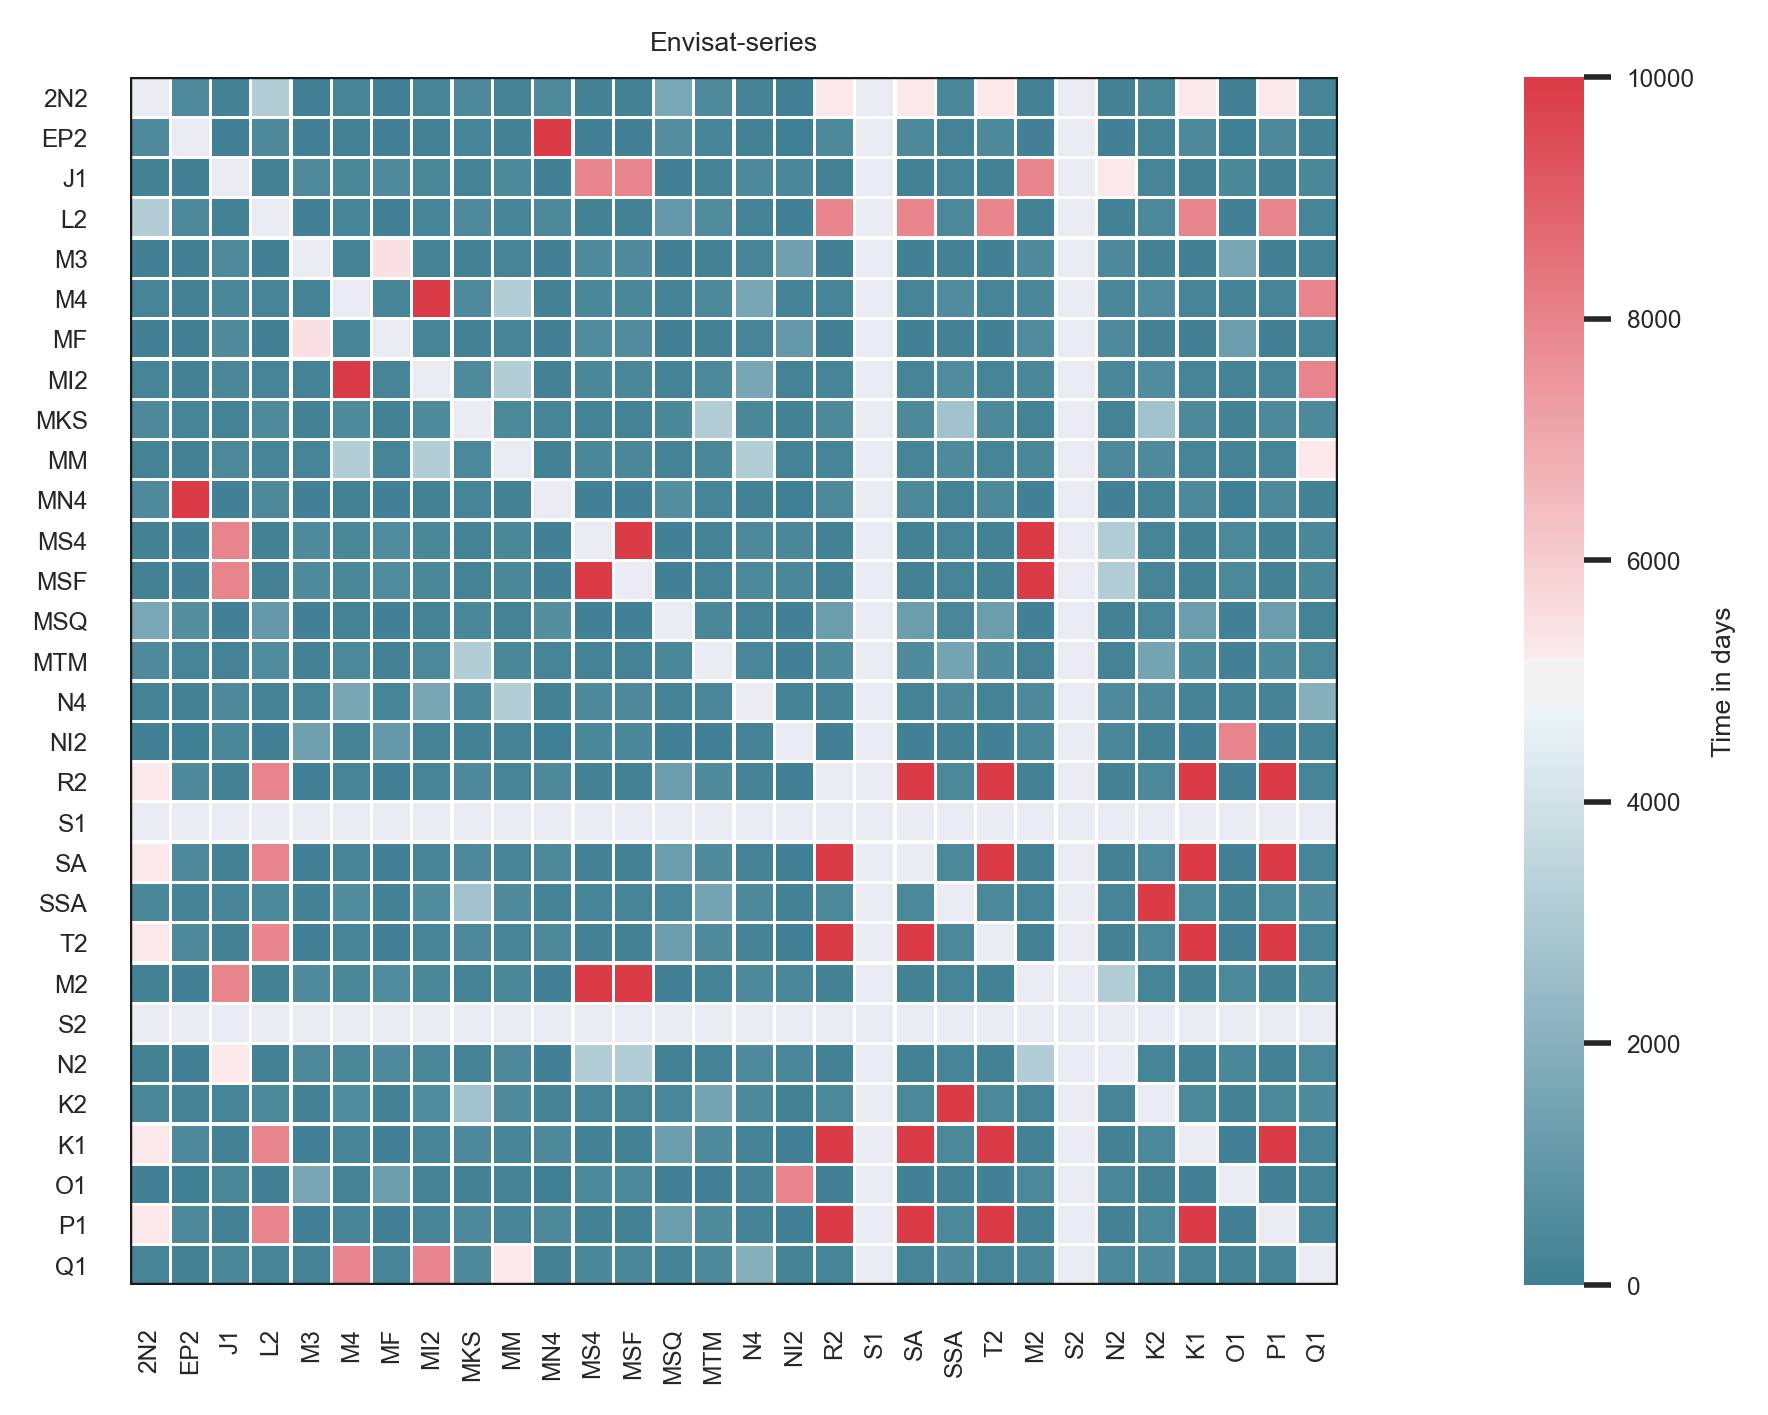

In [28]:
sns.set_style("darkgrid")
letters = string.ascii_letters
sns.set(font_scale=0.5)

d = pd.DataFrame(Ry_E)
# Compute the correlation matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(d, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False

# Set up the matplotlib figure
f, ax = plt.subplots(1,1,figsize=(15,5),dpi=320)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True,center='light')

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(d, mask=mask, cmap=cmap, vmax=10000, vmin = 0 , 
            square=True,linewidths=.5, cbar_kws={"label": 'Time in days'}, ax=ax,
                 xticklabels=constituent,yticklabels=constituent,cbar=True,)

ax.set_title("Envisat-series")

ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=d.shape[1], color='k',linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=d.shape[0], color='k',linewidth=1)

# plt.savefig("/Users/michaelhart-davis/Documents/GitHub/eot20_tides/figures/Minor_Tide_Paper/rayleigh_en.png")

plt.show()

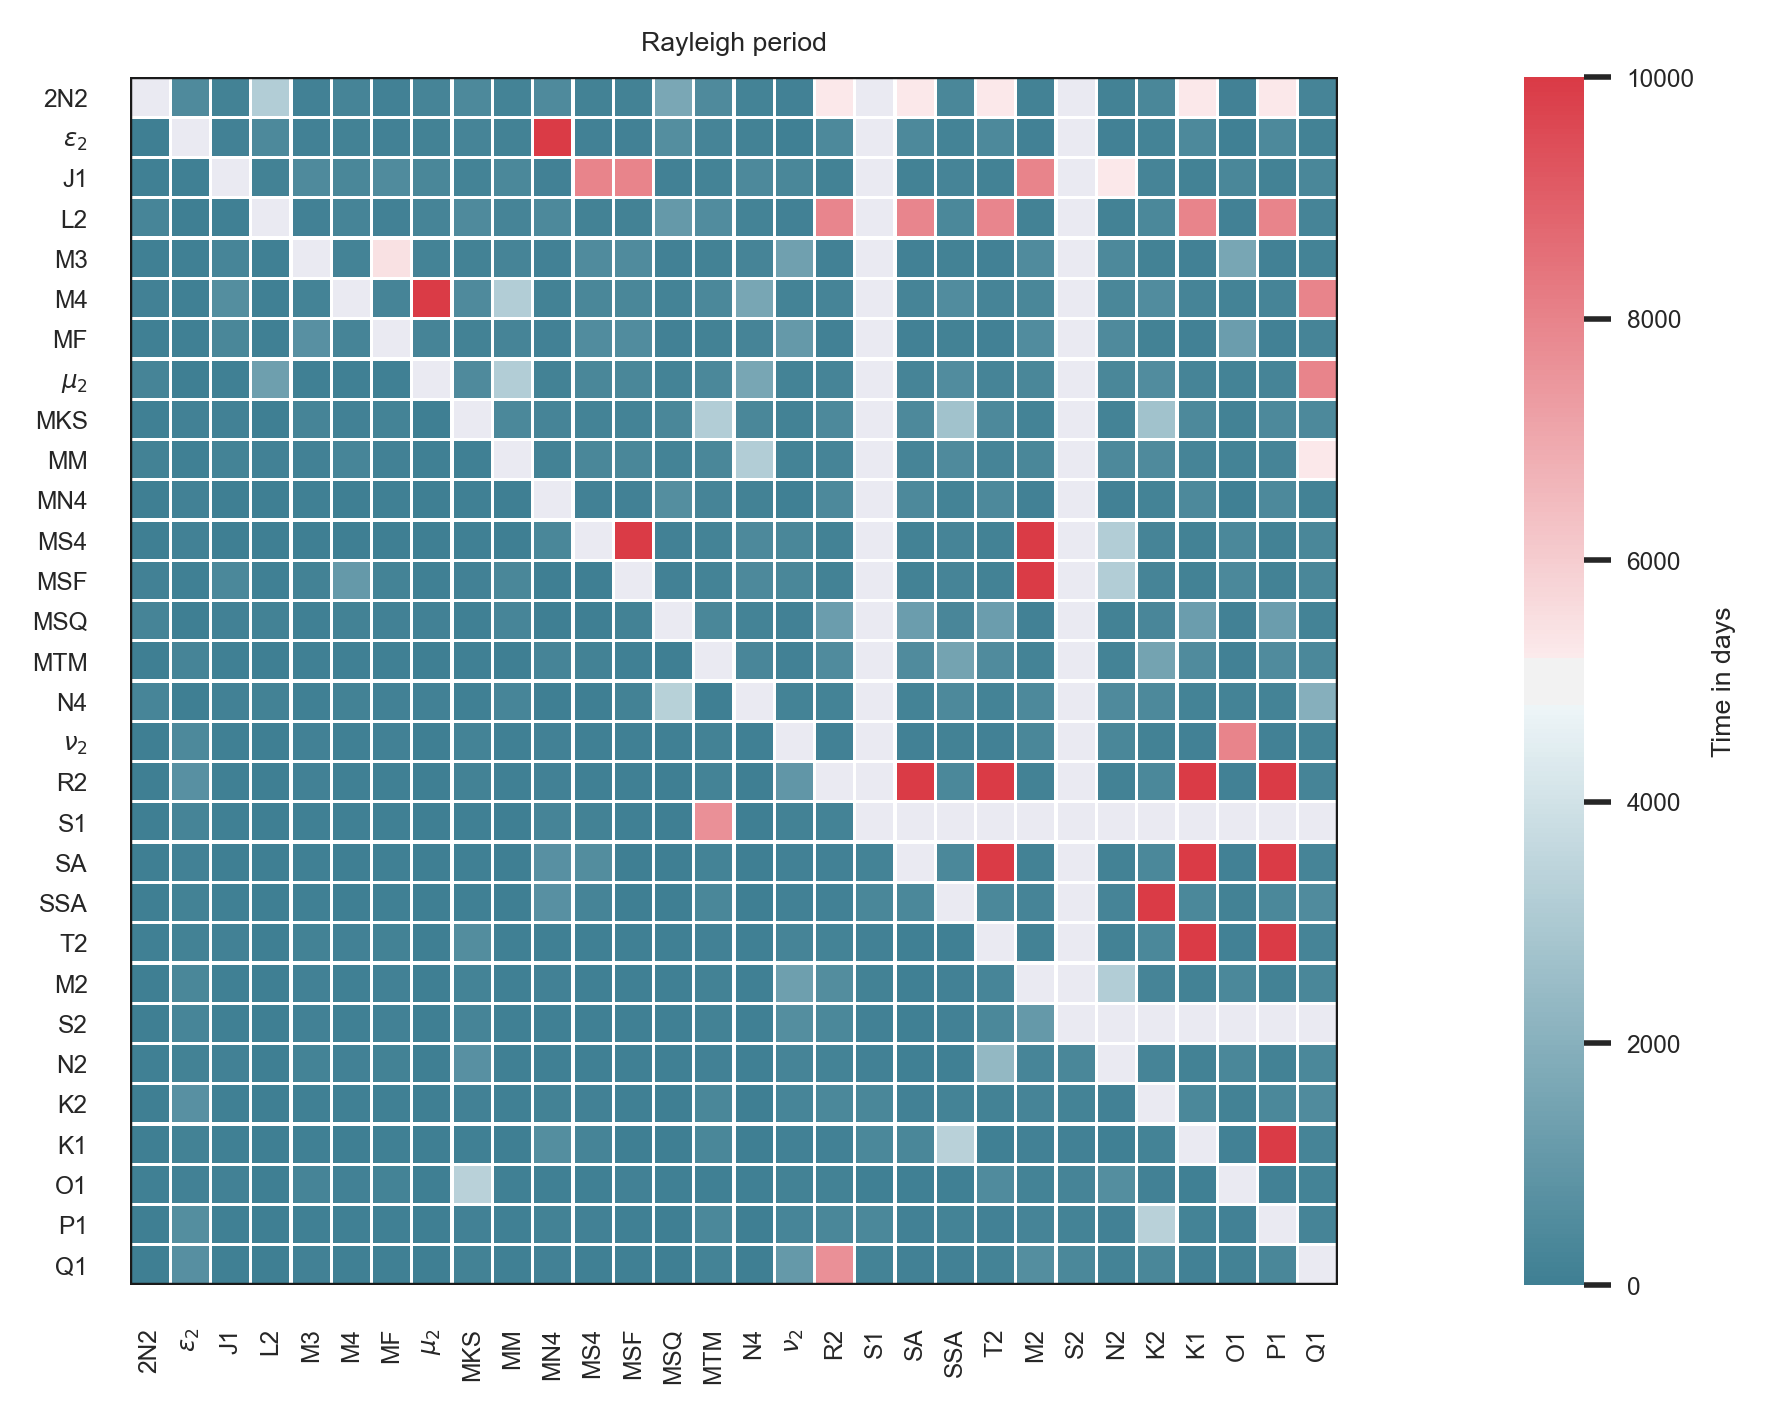

In [32]:
sns.set_style("darkgrid")
letters = string.ascii_letters
sns.set(font_scale=0.5)

d = pd.DataFrame(Ry_E)
# Compute the correlation matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(d, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False

# Set up the matplotlib figure
f, ax = plt.subplots(1,1,figsize=(15,5),dpi=320)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True,center='light')

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(d, mask=mask, cmap=cmap, vmax=10000, vmin = 0 , 
            square=True,linewidths=.5, cbar_kws={"label": 'Time in days'}, ax=ax,
                 xticklabels=constituent,yticklabels=constituent,cbar=True,)

ax.set_title("Rayleigh period")

ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=d.shape[1], color='k',linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=d.shape[0], color='k',linewidth=1)

d = pd.DataFrame(Ry_J)

mask = np.zeros_like(d, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(d, mask=mask, cmap=cmap, vmax=10000, vmin = 0 , 
            square=True,linewidths=.5, cbar_kws={"label": 'Time in days'}, ax=ax,
                 xticklabels=constituent,yticklabels=constituent,cbar=False,)

cons = ["2N2","$\epsilon_{2}$","J1","L2","M3","M4","MF","$\mu_{2}$","MKS","MM","MN4","MS4","MSF","MSQ"
            ,"MTM","N4","$\\nu_{2}$","R2","S1","SA","SSA","T2",'M2','S2','N2','K2','K1','O1','P1','Q1']

ax.set_xticklabels(cons)
ax.set_yticklabels(cons)

plt.savefig("/Users/hart-davis/Documents/GitHub/eot20_tides/figures/Minor_Tide_Paper/rayleigh_both.png")

plt.show()